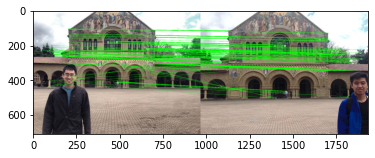

In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

def find_keypoint_matches(img1, img2):
    # Initiate ORB detector
    orb = cv2.ORB_create()

    # find the keypoints with ORB
    kp1 = orb.detect(img1, None)
    kp2 = orb.detect(img2, None)

    # compute the descriptors with ORB
    kp1, des1 = orb.compute(img1, kp1)
    kp2, des2 = orb.compute(img2, kp2)

    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)    # this should be brute force hamming
    matches = bf.match(des1, des2)
    sorted_matches = sorted(matches, key=lambda x: x.distance, reverse=True)
    return sorted_matches, kp1, kp2

# Print lines that connect matching keypoints across two images
def display_keypoint_matches(img1, img2, kp1, kp2, matches):
    concat_image = np.concatenate((img1, img2), axis=1)
    h, w = img1.shape[:2]
    for m in matches:
        color = (0, 255, 0)
        cv2.line(concat_image, (int(kp1[m.queryIdx].pt[0]), int(kp1[m.queryIdx].pt[1])), (int(kp2[m.trainIdx].pt[0] + w), int(kp2[m.trainIdx].pt[1])), color)
    
    plt.imshow(concat_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Prune matches based distance attribute
def prune_keypoint_matches_by_distance(matches):
    FACTOR = 10
    pruned_matches = []
    threshold = matches[-1].distance * FACTOR
    for m in matches:
        if m.distance < threshold:
            pruned_matches.append(m)
    return pruned_matches

# call function
# pruned_matches = prune_keypoint_matches_by_distance(matches)
    
img1  = cv2.imread('man.png')
img2  = cv2.imread('man2_hist.png')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

#crop img1 to img2 size
img2 = img2[0:img1.shape[0], 0:img1.shape[1]]

#call the function 
matches, kp1, kp2 = find_keypoint_matches(img1, img2)

matches = prune_keypoint_matches_by_distance(matches)

display_keypoint_matches(img1, img2, kp1, kp2, matches)

In [2]:
src_pts = np.float32([ kp1[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)                  #RANSAC
out = cv2.warpPerspective(img1,M,[img2.shape[1],img2.shape[0]])

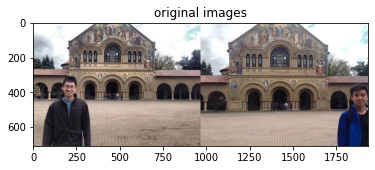

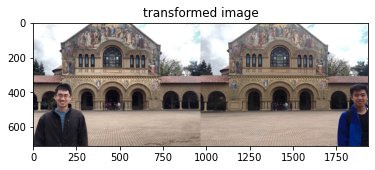

In [3]:
concat_image1 = np.concatenate((img1, img2), axis=1)
plt.imshow(concat_image1)
plt.title('original images')
plt.show()
concat_image2 = np.concatenate((out, img2), axis=1)
plt.imshow(concat_image2)
plt.title('transformed image')
plt.show()